In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
from pandas import ExcelWriter
plt.style.use('ggplot')
from pandas import ExcelWriter

In [4]:
df = pd.read_csv("/Users/rushabh/Rushabh/Untitled Folder/Datasets/zomato-restaurants-data/zomato.csv")
df_country_codes = pd.read_excel("/Users/rushabh/Rushabh/Untitled Folder/Datasets/zomato-restaurants-data/Country-Code.xlsx")

In [5]:
df = pd.merge(left=df, right=df_country_codes, on='Country Code', how='left')

In [5]:
df=df[['Restaurant ID','Restaurant Name', 'Country Code', 'City',
        'Country', 'Address', 'Locality', 'Locality Verbose', 
        'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 
        'Currency', 'Has Table booking', 'Has Online delivery', 
        'Is delivering now', 'Switch to order menu', 'Price range', 
        'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]

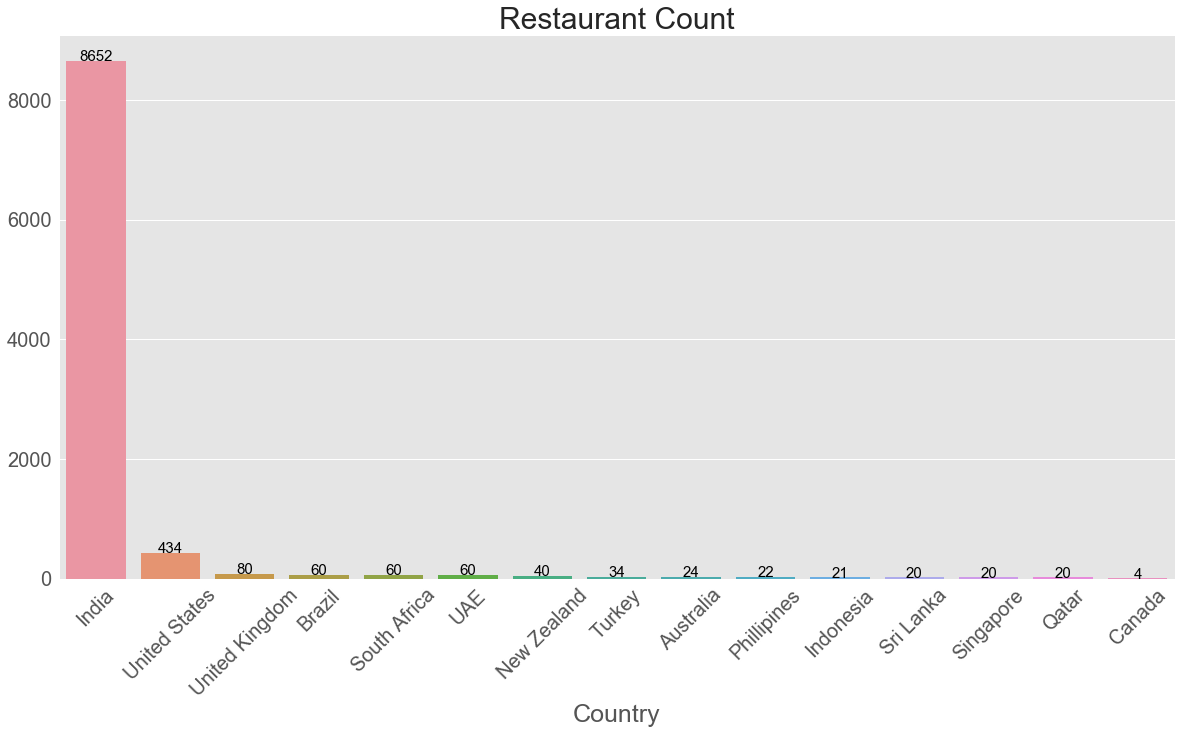

In [6]:
#The following 2 cells plot the graph

country_count_df = pd.DataFrame(df.Country.value_counts(),).reset_index()
country_count_df.columns=['Country','Count']

plt.figure(figsize=(20,10))
sns.barplot(country_count_df.Country, country_count_df.Count)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('Country', fontsize=25)
plt.ylabel('')
plt.title("Restaurant Count", fontsize=30)
x=0
for i in country_count_df.values:
    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
    x+=1

plt.show()

As India has single-handedly dominates the entire dataset with 8652 entries, followed by United States with 434 entries. 
Comparative analysis will be performed in 3 ways: overall(not always), Indian and United States analysis.

In [7]:
india_df = df[df['Country']=='India']

#india_df['Price range'].value_counts()

usa_df = df[df['Country']=='United States']

#usa_df['Price range'].value_counts()

Average Cost per Country

In [8]:
country_avg_cost = df.groupby(['Country', 'Currency'], as_index=False)['Average Cost for two'].mean()
country_avg_cost.columns = ['Country', 'Currency', 'Cost']

#Sorting by Average Ratings
#country_avg_cost=country_avg_cost.sort_values(by=['Cost'], ascending=False)
#Rounding off the ratings
country_avg_cost['Cost'] = country_avg_cost['Cost'].apply(lambda x: round(x,2))

country_avg_cost

,Country,Currency,Cost
0,Australia,Dollar($),24.08
1,Brazil,Brazilian Real(R$),134.67
2,Canada,Dollar($),36.25
3,India,Indian Rupees(Rs.),623.37
4,Indonesia,Indonesian Rupiah(IDR),281190.48
5,New Zealand,NewZealand($),69.75
6,Phillipines,Botswana Pula(P),1606.82
7,Qatar,Qatari Rial(QR),223.75
8,Singapore,Dollar($),155.75
9,South Africa,Rand(R),419.73


In [9]:
#These were the string that were running outside the scope of ascii
df['Cuisines'][9530] = "Kebab, Turkish Pizza, Doner"
df['Cuisines'][9544] = "Desserts, Borek"

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The dataset below will make it easier to perform important analysis on Cuisines.

In [6]:
#We divide the main dataframe by the Cuisine column. 
#For example, if a restaurant has 3 different kinds of cuisines. 
#This dataframe(cuisine_df) will have 3 different instances of the same restaurant.

s = df['Cuisines'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Cuisine'
#del df['Cuisines']
cuisine_df = df.join(s)
del cuisine_df['Cuisines']

cuisine_df=cuisine_df[['Restaurant ID','Restaurant Name', 'Country Code', 'City',
        'Country', 'Address', 'Locality', 'Locality Verbose', 
        'Longitude', 'Latitude', 'Cuisine', 'Average Cost for two', 
        'Currency', 'Has Table booking', 'Has Online delivery', 
        'Is delivering now', 'Switch to order menu', 'Price range', 
        'Aggregate rating', 'Rating color', 'Rating text', 'Votes' ]]

cuisine_df.Cuisine = cuisine_df.Cuisine.str.strip(' ')

cuisine_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Country,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Phillipines,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,Phillipines,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,Phillipines,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Phillipines,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,Phillipines,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [7]:
s

0                French
0              Japanese
0              Desserts
1              Japanese
2               Seafood
2                 Asian
2              Filipino
2                Indian
3              Japanese
3                 Sushi
4              Japanese
4                Korean
5               Chinese
6                 Asian
6              European
7               Seafood
7              Filipino
7                 Asian
7              European
8              European
8                 Asian
8                Indian
9              Filipino
10             Filipino
10              Mexican
11             American
11            Ice Cream
11             Desserts
12             Filipino
12              Mexican
             ...       
9533      Turkish Pizza
9534              Kebab
9534           Desserts
9534      Turkish Pizza
9535              Kebab
9535           Desserts
9535      Turkish Pizza
9536              Pizza
9537           Desserts
9538               Cafe
9539    Restaura

Is there a correlation between how expensive a restaurant is and how well its rated?

Below, we plot a graph to check the very same thing.

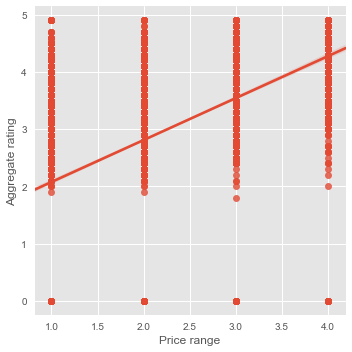

In [19]:
sns.lmplot(x='Price range', y='Aggregate rating', data=df)

#plt.title('Correlation between Price Range and Aggregate Rating')
plt.show()

With that, lets also check the correlation of all the attributes.

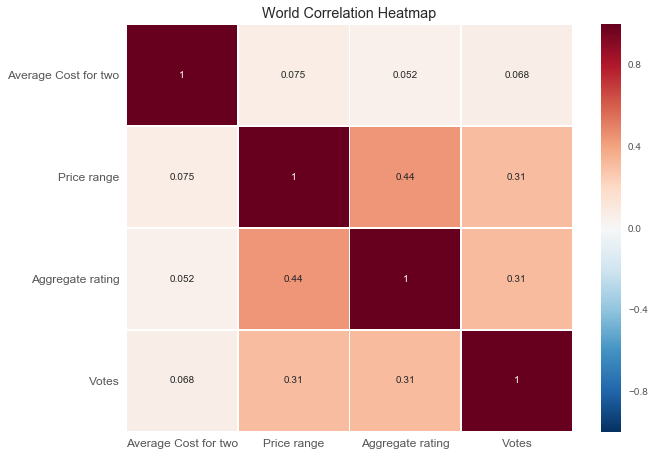

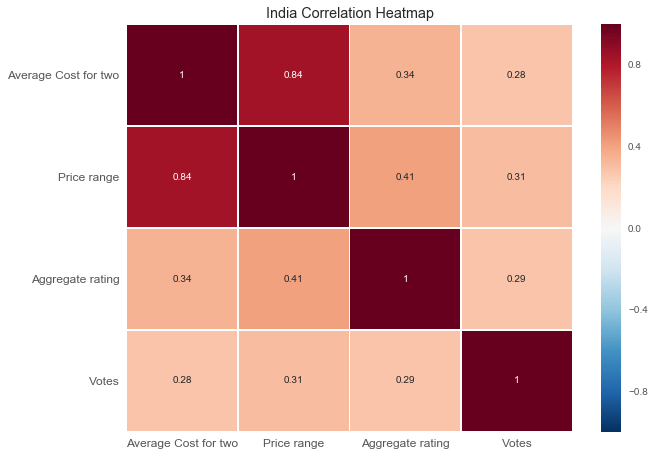

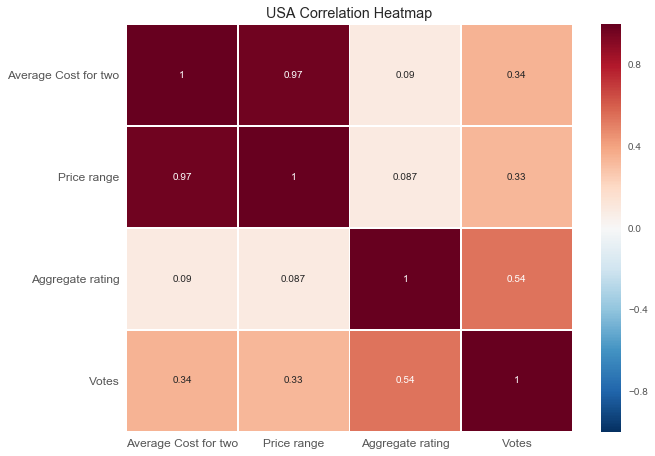

In [20]:
#Overall 
df_corr=df[['Average Cost for two', 'Price range','Aggregate rating','Votes']].corr()
plt.figure(figsize=(10,7.5))
sns.heatmap(df_corr, center=0, annot=True, linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('World Correlation Heatmap')
#plt.show()

#INDIA
india_corr=df[df['Country']=='India'][['Average Cost for two', 'Price range','Aggregate rating','Votes']].corr()
plt.figure(figsize=(10,7.5))
sns.heatmap(india_corr, center=0, annot=True, linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('India Correlation Heatmap')


#USA
usa_corr=df[df['Country']=='United States'][['Average Cost for two', 'Price range','Aggregate rating','Votes']].corr()
plt.figure(figsize=(10,7.5))
sns.heatmap(usa_corr, center=0, annot=True, linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('USA Correlation Heatmap')
plt.show()

'Price range' is correlated with 'Average Cost for two' because they have been derived from each other but apart from that there are no clear signs of any correlations.

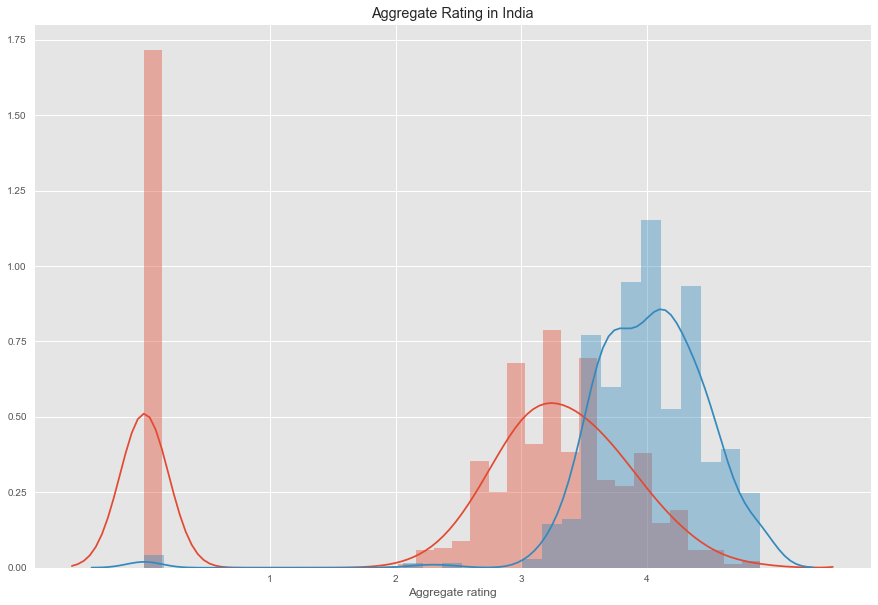

In [25]:
plt.figure(figsize=(15,10))

#sns.distplot(df['Votes'])
sns.distplot(india_df['Aggregate rating'])
plt.xticks([1,2,3,4])
plt.title('Aggregate Rating in India')
sns.distplot(usa_df['Aggregate rating'])

plt.xticks([1,2,3,4])
plt.show()

In [312]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


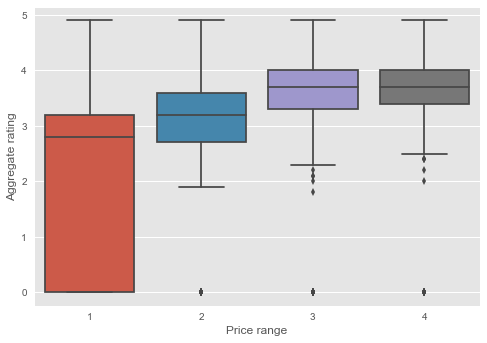

In [403]:
india_rating_price_range = india_df.groupby('Price range').agg({'Aggregate rating':'mean',
                                   'Price range':'count'})
india_rating_price_range.columns=['Rating','Count']
india_rating_price_range = india_rating_price_range.reset_index()

india_rating_price_range

sns.boxplot(x='Price range', y='Aggregate rating', data=india_df)
plt.show()

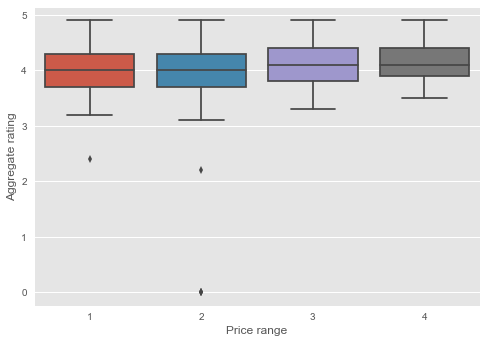

In [61]:
usa_rating_price_range = usa_df.groupby('Price range').agg({'Aggregate rating':'mean',
                                   'Price range':'count'})
usa_rating_price_range.columns=['Rating','Count']
usa_rating_price_range = usa_rating_price_range.reset_index()

usa_rating_price_range

sns.boxplot(x='Price range', y='Aggregate rating', data=usa_df)
plt.show()

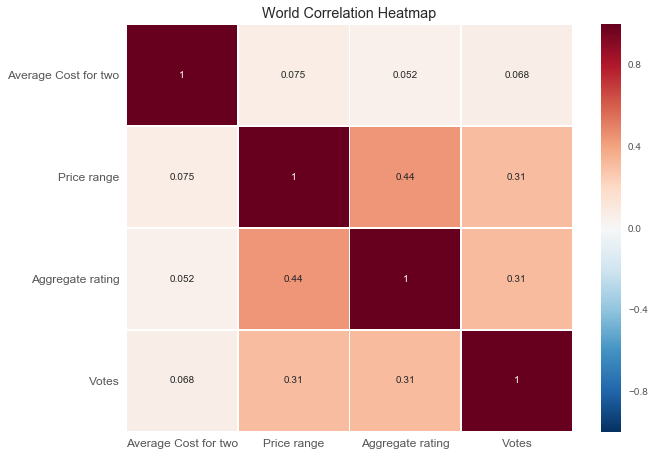

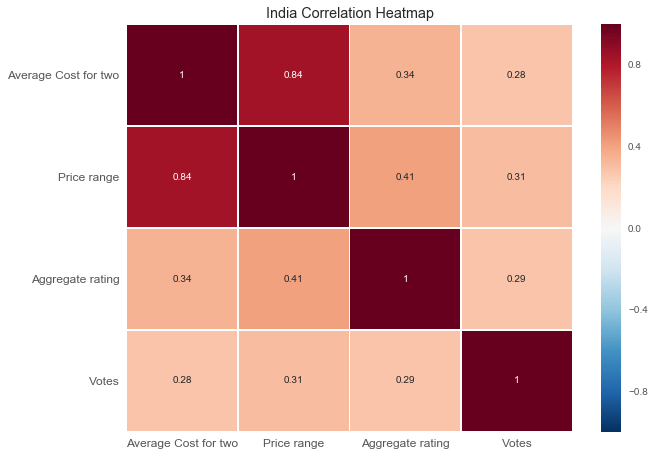

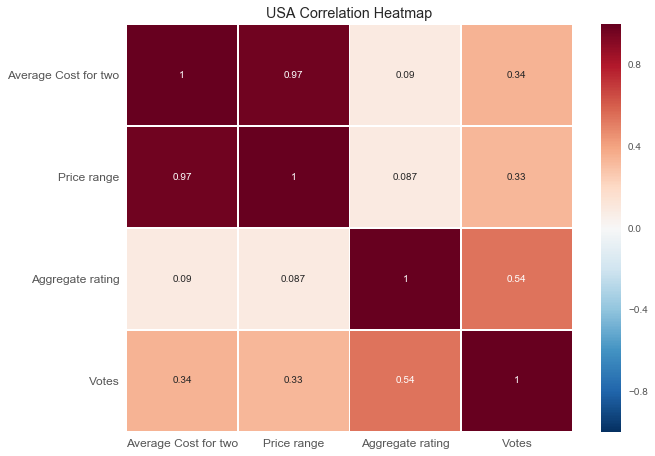

In [50]:
#Firstly 
df_corr=df[['Average Cost for two', 'Price range','Aggregate rating','Votes']].corr()
plt.figure(figsize=(10,7.5))
sns.heatmap(df_corr, center=0, annot=True, linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('World Correlation Heatmap')
#plt.show()

#INDIA
india_corr=df[df['Country']=='India'][['Average Cost for two', 'Price range','Aggregate rating','Votes']].corr()
plt.figure(figsize=(10,7.5))
sns.heatmap(india_corr, center=0, annot=True, linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('India Correlation Heatmap')


#USA
usa_corr=df[df['Country']=='United States'][['Average Cost for two', 'Price range','Aggregate rating','Votes']].corr()
plt.figure(figsize=(10,7.5))
sns.heatmap(usa_corr, center=0, annot=True, linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('USA Correlation Heatmap')
plt.show()

On making the box plot of 'Aggregate ratings' with respect to whether restaurants have table bookings.
We see that restaurants with table bookings have a higher ratings.

Also, it can be seen that users in the 'Yes' column share opinions with each other because the range of values is very small. 

In [367]:
df.columns

Index([       u'Restaurant ID',      u'Restaurant Name',
               u'Country Code',                 u'City',
                    u'Country',              u'Address',
                   u'Locality',     u'Locality Verbose',
                  u'Longitude',             u'Latitude',
                   u'Cuisines', u'Average Cost for two',
                   u'Currency',    u'Has Table booking',
        u'Has Online delivery',    u'Is delivering now',
       u'Switch to order menu',          u'Price range',
           u'Aggregate rating',         u'Rating color',
                u'Rating text',                u'Votes'],
      dtype='object')

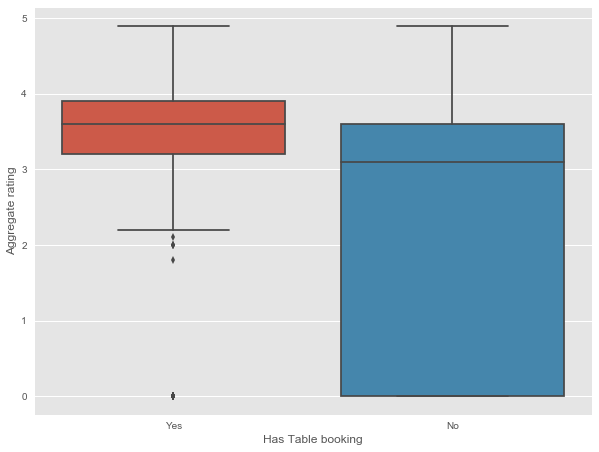

In [379]:
plt.figure(figsize=(10,7.5))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title
plt.show()

Below, we're trying to find the most famous Cuisine in each country.

In [349]:
country_cuisine_count_df=pd.DataFrame(cuisine_df.groupby('Country')['Cuisine'].value_counts())

country_cuisine_count_df.columns=['Count']
country_cuisine_count_df=country_cuisine_count_df.reset_index()

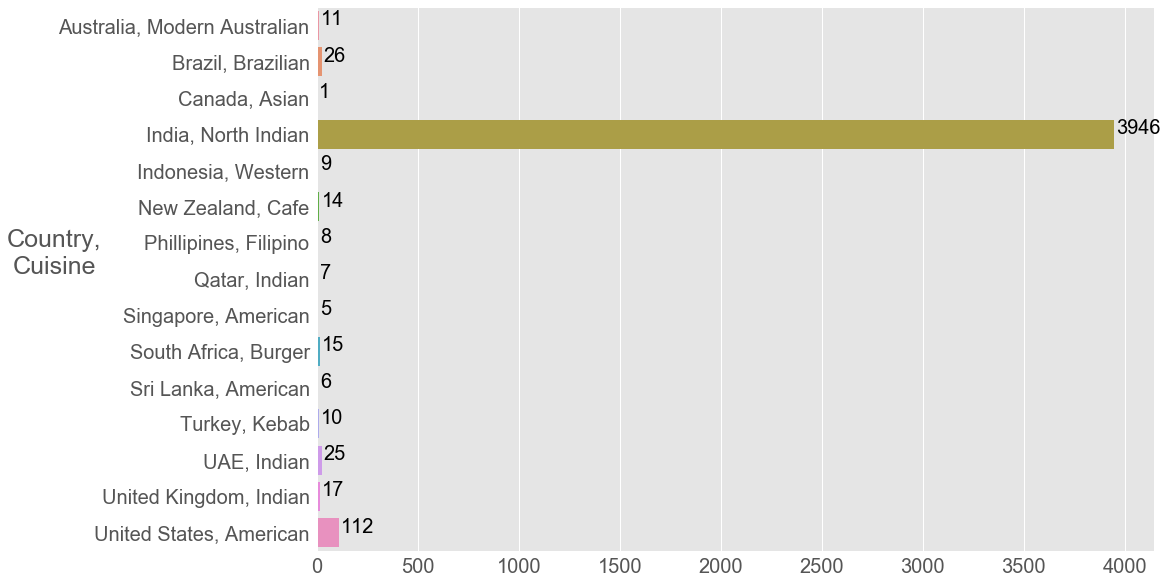

In [351]:
#Top Cuisine

top_cuisine_df=pd.DataFrame(country_cuisine_count_df.groupby('Country').first().reset_index())
top_cuisine_df['Text']=top_cuisine_df['Country']+", "+top_cuisine_df['Cuisine']

#Plotting the above
plt.figure(figsize=(15,10))
sns.barplot(y='Text', x='Count', data=top_cuisine_df)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title("Restaurants in every Country", fontsize=30)
plt.xlabel("")
plt.ylabel("Country,\nCuisine", fontsize=25, rotation=0)

x=0
for i in top_cuisine_df.Count:
    plt.text(i+10, x, i, color='black', ha="left", fontsize=20)
    x+=1

plt.show()

In [278]:
list_overall=cuisine_df.Cuisine.value_counts().nlargest(10).index
list_overall=list(list_overall)

list_ind=cuisine_df[cuisine_df['Country']=='India'].Cuisine.value_counts().nlargest(10).index
list_ind=list(list_ind)

list_usa=cuisine_df[cuisine_df['Country']=='United States'].Cuisine.value_counts().nlargest(10).index
list_usa=list(list_usa)

In [205]:
cuisine_df[cuisine_df['Cuisine'].isin(list1)]

,Restaurant ID,Restaurant Name,Country Code,City,Country,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Phillipines,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,Phillipines,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Phillipines,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,Phillipines,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,Phillipines,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Phillipines,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
3,6318506,Ooma,162,Mandaluyong City,Phillipines,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Phillipines,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,Phillipines,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,Phillipines,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520


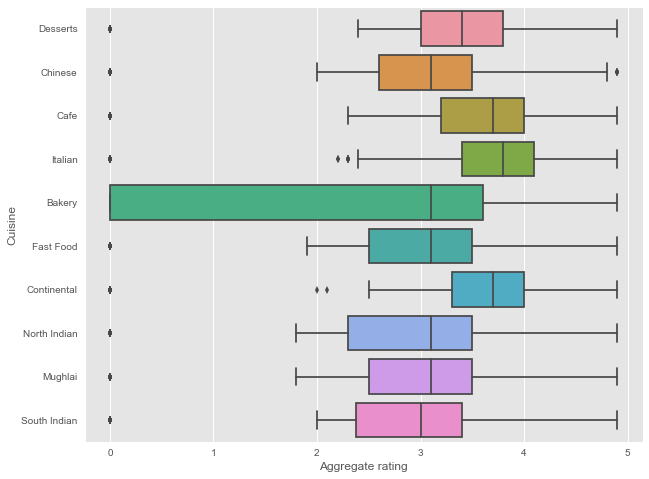

In [336]:
#OVERALL
plt.figure(figsize=(10,8))
sns.boxplot(y='Cuisine', x='Aggregate rating', data=cuisine_df[cuisine_df['Cuisine'].isin(list_overall)])
plt.show()

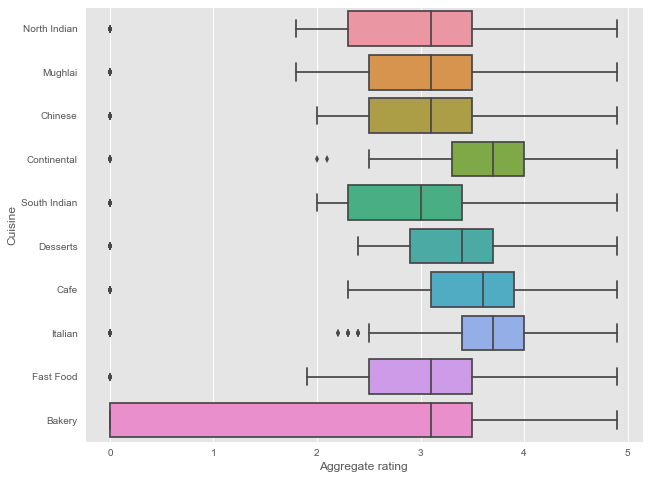

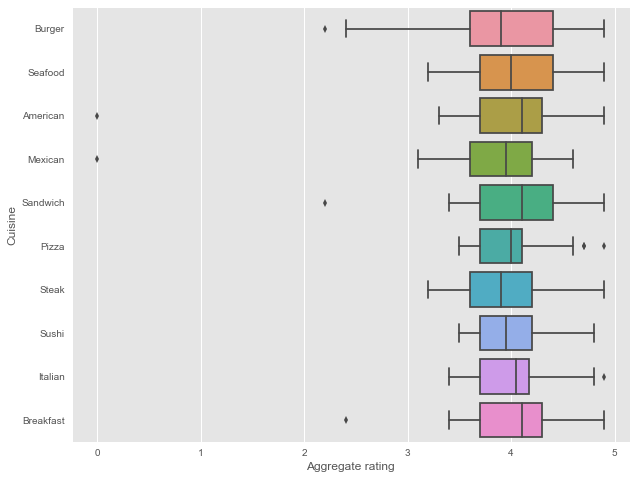

In [359]:
#INDIA
plt.figure(figsize=(10,8))
sns.boxplot(y='Cuisine', x='Aggregate rating', data=cuisine_df[(cuisine_df['Cuisine'].isin(list_ind)) & 
                                                               (cuisine_df['Country']=='India')])
plt.show()

#The max rating of all the cuisines is the same. 
#But people have rated restaurants serving 'Italian and Continental the most.
#The spread being very small proves that most of the people share their opinions 
#Cafe also seems like a good choice because India has a young population who spend their time in cafes alot.

#USA

plt.figure(figsize=(10,8))
sns.boxplot(y='Cuisine', x='Aggregate rating', data=cuisine_df[(cuisine_df['Cuisine'].isin(list_usa)) & 
                                                               (cuisine_df['Country']=='United States')])
plt.show()



In [389]:
#India Locality Rating
ind_locality_rating = pd.DataFrame(india_df.groupby(['Locality','City']).agg({'Locality':'count',
                                                                              'Aggregate rating':'mean',
                                                                              'Votes':'mean'}))

ind_locality_rating.columns = ['Votes','Rating','Count']
ind_locality_rating=ind_locality_rating.reset_index()

ind_locality_rating.head()


#USA Locality Rating
us_locality_rating = pd.DataFrame(usa_df.groupby(['Locality','City']).agg({'Locality':'count',
                                                                           'Aggregate rating':'mean',
                                                                           'Votes':'mean'}))

us_locality_rating.columns = ['Votes','Rating','Count']
us_locality_rating=us_locality_rating.reset_index()

us_locality_rating.head()

,Locality,City,Votes,Rating,Count
0,Albany,Albany,87.157895,3.563158,19
1,Ames,Des Moines,797.500000,4.700000,2
2,Athens,Athens,637.500000,4.200000,20
3,Augusta,Augusta,427.066667,4.140000,15
4,Beaverdale,Des Moines,674.000000,4.500000,1


19719

In [366]:
df.columns

Index([       u'Restaurant ID',      u'Restaurant Name',
               u'Country Code',                 u'City',
                    u'Country',              u'Address',
                   u'Locality',     u'Locality Verbose',
                  u'Longitude',             u'Latitude',
                   u'Cuisines', u'Average Cost for two',
                   u'Currency',    u'Has Table booking',
        u'Has Online delivery',    u'Is delivering now',
       u'Switch to order menu',          u'Price range',
           u'Aggregate rating',         u'Rating color',
                u'Rating text',                u'Votes'],
      dtype='object')